# Convolutional Neural Networks
The workhorse of modern image processing
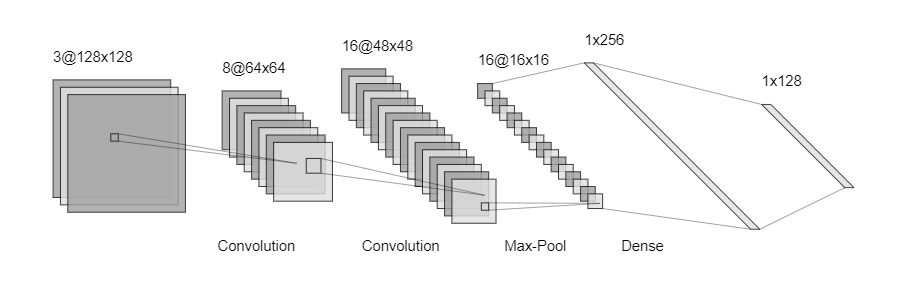

## Terminology
**Abreviation**: often called "CNNs" or Conv Nets

**Convolutional layer**: A set of kernels + bias terms (usually referring to 2D convolutions)

**Pooling Layers:** Typically used to reduce spatial dimensions

### Channels

We will often talk about **channels**, which for an image is RGB (maybe D), however is a more abstract concept for a CNN. In a CNN each channel is simply the non-spatial dimension (for example $32\times 32 \times 8$). Looking at the example above we can see the channel is the number of grey boxes, moving from 3 to 8 to 16.

The number of channels is also the same as the number of kernels.

# Interactive Example
Lets look at a slightly different architecture which does a 10-way classification of 64x64 RGB images

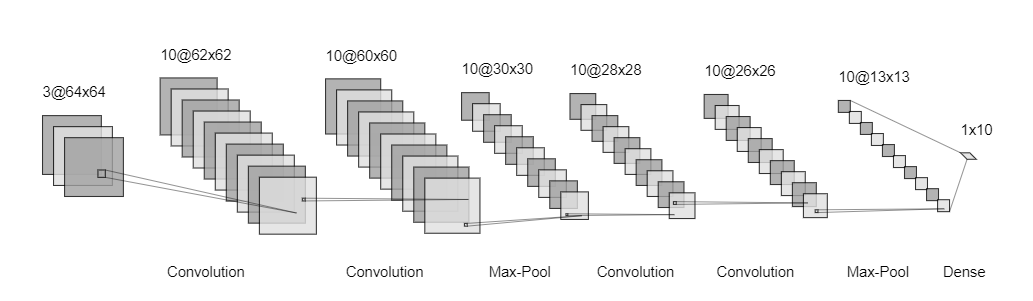

[Interactive CNN](https://poloclub.github.io/cnn-explainer/)


## Mathematics of Conv Nets

Lets take a brief look at the operations occuring at each layer in our CNN.

### 2D Convolution

The most common operation, applies a convolutional kernel over a 2D spatial domain. However, this doesn't mean the operator is 2D! For a single kernel we want to transform our image representation into a 2D "activation map". 

Basically we want to go from $H\times W \times C$ to $\tilde{H} \times \tilde{W}$. The ~ is to signify that the spatial dimensions might change a little due to edge effects. 

The 2D convolution operator will handle the spatial dimensions, as it by definition will "scan" over the entire image. How is the channel dimension handeled?



---------------------------------Filler---------------------------
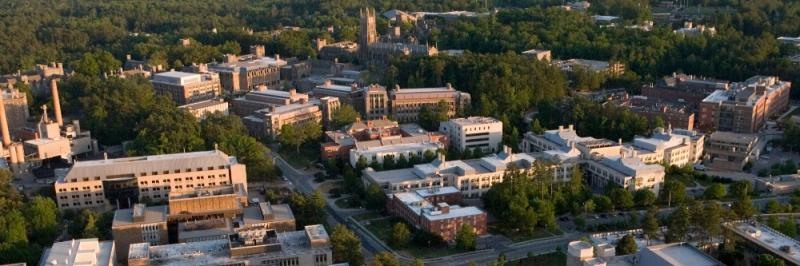

Our convolutional kernels require a channel dimension to work properly. 

This is often implied by the context of the layer and not declared directly. In the first layer of the example network we apply a 3x3 convolution on an RGB image. In reality this "3x3" convolution actually has kernels which are "3x3x3".

## Understanding the API
While a firm mathematical understanding is useful, for the most part the math is handled by a machine learning framework. Lets take a look at how tensorflow allows you to define convolutional layers and what each of the parameters mean:

I like the keras documentation: [Conv2D layer](https://keras.io/api/layers/convolution_layers/convolution2d/)


```
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding="valid",
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```

### filters
- The number of convolutions you want to apply to the input. In our example above we were using 10.

### kernel_size
- The size of the filter you want to use for the convolution operation
- You can specify either a single number for a square kernel (typical) or two numbers to specify the `x` and `y` dimensions
- The "depth" of the filter (the number of channels in the prior layer) is handled implicitly in keras

### strides
- The typical discrete convolution you learned in a signal processing class looks like this:

$$ (f*g)[n] = \sum_{m = -\infty}^\infty f[m]g[n-m]$$

Of course for a 3x3 kernel this looks like (here the kernel is "f"):

$$ (f*g)[n] = \sum_{m = -1}^1 f[m]g[n-m]$$

This means that, except for edges, for every input position "n" we have an output. The stride controls this by limiting the values "n" over which our operation is evaluated on, for example with a stride of 2:

$$ \begin{cases} (f*g)[n] = \sum_{m = -1}^1 f[m]g[n-m] & \text{even n} \\ \text{not defined} & \text{odd n}\end{cases}$$

This is a complicated way of saying stride controls the interval of $n$ which we apply our convolution expression on. You can define stride the same way you define the kernel size

- We often use "strided convolutions" instead of pooling layers, **any ideas why**?

### padding
- Either "valid" or "same"
- Valid means we only apply our convolution when the data exists (which means our edges don't get included). This has the effect of reducing the spatial dimension
- Same means we "pad" our image so that the edges are included and the spatial dimension remains the same

### data_format
- Either `channels_first` or `channels_last`
- `channels_first` is `C x H x W`
- `channels_last` is `H x W x C` (typical RGB format)

### dilation_rate/groups
- Too advanced, don't touch

### activation
- The non-linearity that is applied after the convolution

### use_bias
- Controls if each filter should include a bias term that is added to the resultant

### initializers/ regularizers/ constraints
- Too advanced, dont' touch

Some neat visualizations stolen from here: https://stats.stackexchange.com/questions/360899/difference-between-strided-and-non-strided-convolution



In [4]:
from IPython.display import Image
# normal convolution
Image(url='https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif')

In [3]:
# strided
Image(url='https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_strides.gif')

## Hands on coding
- You already have used convolutional layers before, but now we will work with some data from scratch
- To help you out I've included some "scaffolding" code to get you started
- I'd encourage you to copy your code forward from each exercise so you don't have to re-type it

**IMPORTANT** Save the perfomance of each model after running an experiment (calling model.evaluate) using a unique variable name! We will be using those performance values multiple times in the exercise and you don't want to re-run everything.

## Exercise: clothing image classification (fashion MNIST)
### Impact of depth
Using a constant number of filters per-layer and kernel size (8 filters, 3x3 kernel). Use "valid" padding
- Build a 1-layer CNN
- Build a 3-layer CNN
- Build a 5-layer CNN

- After your n convolutional layers you can "flatten" your data and use a fully connected layer to get to a 10-way classification ouput (see provided code)

- Train and test your model using each of the above architectures, training for 15 epochs
- Plot test loss vs. number of layers

### Pooling

You may notice a concentration of parameter count in your fully connected layer, this is generally a bad idea as it adds a lot of computational overhead with very little performance benefits (after all it's just a linear combination of numbers).

**Change the padding to "same" otherwise it gets too small**
- Modify each of your networks to include a max pooling layer after every two convolutional layers (conv-conv-pool). Using 2x2 max pooling.
    - This means you'll have zero, one, and two pooling layers for the 1-layer, 3-layer and 5-layer CNNs
- Plot loss of "pooled" CNNs vs. your unpooled CNNs (one line for each)

### Filter Count
With all those extra parameters we can increase the number of filters in our CNN
- Modify your previous model to increase the number of filters by `4` after each pair of convolutional layers (8 -> 12 -> 16 -> 20 -> 24)
- Modify your previous model to **double** the number of filters after each pair of convolutional layers ( 8 -> 16 -> 32 -> 64 -> 128)
- Plot loss for each configuration (pooled, pooled + 4, pooled doubled)


In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# loading data, run once
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
x_data = train_images.reshape(60000, 28, 28, 1) / 255.0
y_data = np.eye(10)[train_labels]
train_x = x_data[0:50000]
train_y = y_data[0:50000]
val_x = x_data[50000:]
val_y = y_data[50000:]
test_x = test_images.reshape(10000, 28, 28, 1) / 255.0
test_y = np.eye(10)[test_labels]

def gen_model(image_size, num_layers):
    input_layer = tf.keras.layers.Input(image_size)
    num_filters = 8
    for i in range(num_layers):
#        x = tf.keras.layers.... (x)
    x = tf.keras.layers.Flatten()(x)
    out = tf.keras.layers.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(inputs=input_layer, outputs=out)
    return model

image_size = (.., .., ..)
num_layers = -1
model = gen_model(image_size=image_size, num_layers=num_layers)

# optional summary to visualize your model
model.summary()
loss_fn_name = ""
metrics = ['acc']
model.compile(loss=loss_fn_name, metrics=metrics)

# training
num_epochs = 5
model.fit(train_x, train_y, epochs=num_epochs, batch_size=16, validation_data=(val_x, val_y))
test_perf = model.evaluate(test_x, test_y, batch_size=16)

4423680/4422102 [==============================] - 0s 0us/step
